In [2]:
from packages.Utility.Gabor import GaborFilterBanks
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [6]:
class GaborParams():
    
    def getParams(self, shape, i, j):
        multiplier = 360 / shape[3]
        degree = multiplier * i
        num_channel = shape[2]
        
        i += 1
        j += 1
        
        lambd =  np.linspace(5, 10, num_channel)[j - 1]
        theta = degree * np.pi / 180
        psi = j
        sigma = np.linspace(5, 10, num_channel)[-j]
        gamma = np.linspace(0.75, 3, num_channel)[j - 1]
        
        return lambd, theta, psi, sigma, gamma
    

In [7]:
shape = (30, 30, 32, 16)

banks = GaborFilterBanks(GaborParams())
filters = banks.getFilterBanks(shape)

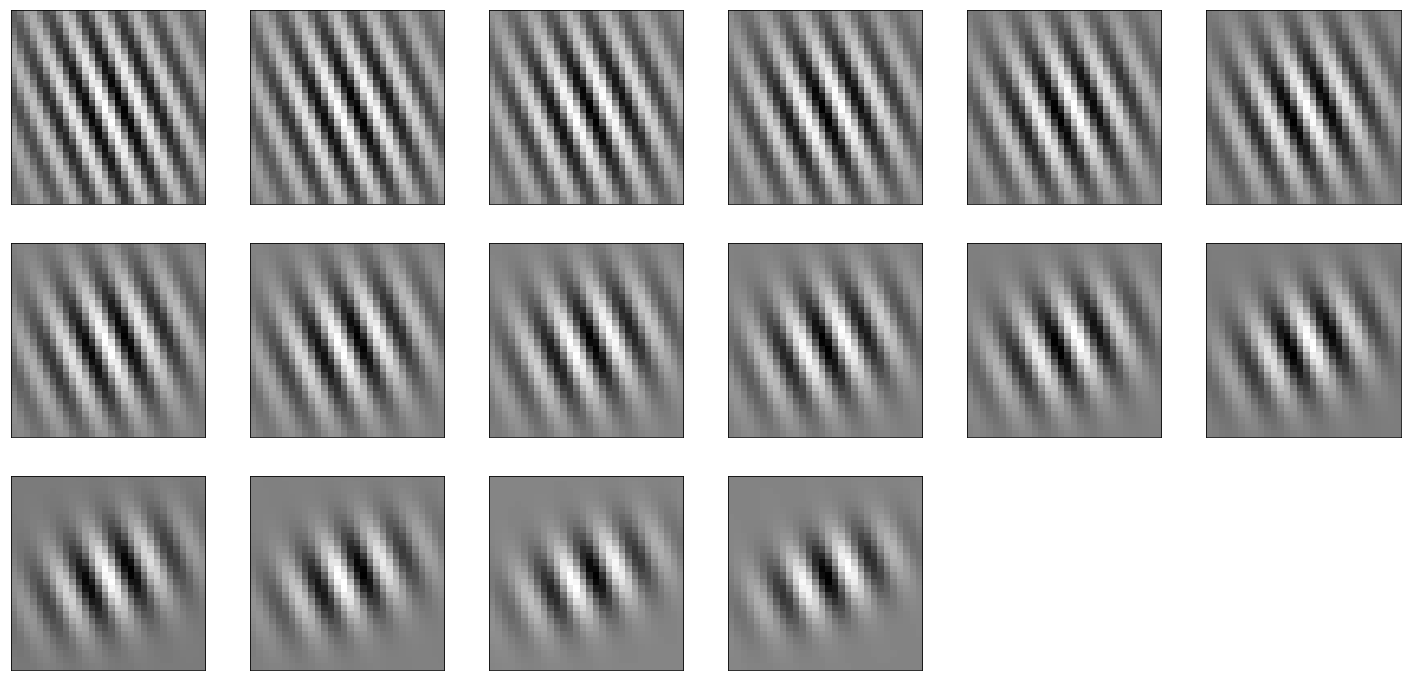

In [8]:
fig = plt.figure(figsize = (25, 25))

for i in range(shape[3]):
    y = plt.subplot(6, 6, i + 1)
    y.imshow(filters[:, :, i, 5], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    
plt.show()